In [16]:
import sys
import os
sys.path.append(os.path.abspath('..'))
import pysal
import esda

import pandas as pd
import pandas_profiling
import geopandas as gpd
import libpysal as lps
import numpy as np
from sklearn import cluster
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import matplotlib.pyplot as plt
import seaborn as sbn
%matplotlib inline



In [17]:
# Load the csv dataset to python
Ede = np.loadtxt(r"C:\UPM\EC Spatial Temporal Analysis\GROUP PROJECT\Data\Pre_processing\Ede_Tickactivity_07to14.csv",delimiter = ',', skiprows = 1, usecols=range(2, 10))
print(Ede.shape)
print(Ede)

(94, 8)
[[ 3.3000000e+01  8.7450000e+01  4.0100000e+01  8.7550000e+01
   2.1300000e+00  7.8000000e-01  1.0000000e-01  5.3600000e-02]
 [ 2.3430000e+01  8.5040000e+01  3.5930000e+01  9.0210000e+01
   4.5700000e+00  3.9000000e-01  5.0000000e-02  3.7506000e+00]
 [ 2.5550000e+01  1.1906000e+02  2.5550000e+01  7.9810000e+01
   1.2100000e+01  1.1500000e+00  1.4000000e-01  8.1585000e+00]
 [ 5.5000000e+01  1.9673000e+02 -1.0000000e-01  6.2870000e+01
   2.7700000e+01  1.0600000e+00  1.3000000e-01  2.2554800e+01]
 [ 8.5190000e+01  1.8684000e+02  3.6550000e+01  7.5680000e+01
   2.5390000e+01  2.9600000e+00  3.6000000e-01  2.9724900e+01]
 [ 1.3010000e+02  2.2057000e+02  2.3430000e+01  8.1130000e+01
   2.8700000e+01  2.1400000e+00  2.6000000e-01  2.7827500e+01]
 [ 1.1923000e+02  2.1371000e+02  5.8650000e+01  8.1840000e+01
   2.7870000e+01  1.7200000e+00  2.1000000e-01  2.0750600e+01]
 [ 1.1435000e+02  2.1810000e+02  1.9030000e+01  8.0030000e+01
   2.6320000e+01  2.0600000e+00  2.5000000e-01  1.81026

In [18]:
Ede_x = Ede[:,0:7]
Ede_y = Ede[:,7]

print(Ede_x)


print(Ede_y)


[[ 3.3000e+01  8.7450e+01  4.0100e+01  8.7550e+01  2.1300e+00  7.8000e-01
   1.0000e-01]
 [ 2.3430e+01  8.5040e+01  3.5930e+01  9.0210e+01  4.5700e+00  3.9000e-01
   5.0000e-02]
 [ 2.5550e+01  1.1906e+02  2.5550e+01  7.9810e+01  1.2100e+01  1.1500e+00
   1.4000e-01]
 [ 5.5000e+01  1.9673e+02 -1.0000e-01  6.2870e+01  2.7700e+01  1.0600e+00
   1.3000e-01]
 [ 8.5190e+01  1.8684e+02  3.6550e+01  7.5680e+01  2.5390e+01  2.9600e+00
   3.6000e-01]
 [ 1.3010e+02  2.2057e+02  2.3430e+01  8.1130e+01  2.8700e+01  2.1400e+00
   2.6000e-01]
 [ 1.1923e+02  2.1371e+02  5.8650e+01  8.1840e+01  2.7870e+01  1.7200e+00
   2.1000e-01]
 [ 1.1435e+02  2.1810e+02  1.9030e+01  8.0030e+01  2.6320e+01  2.0600e+00
   2.5000e-01]
 [ 8.5730e+01  1.7600e+02  2.4530e+01  8.6770e+01  1.4830e+01  1.5200e+00
   1.8000e-01]
 [ 5.3390e+01  1.3590e+02  7.6500e+00  8.8190e+01  8.8400e+00  6.8000e-01
   8.0000e-02]
 [ 2.5900e+01  8.7930e+01  2.7330e+01  9.0570e+01  3.5300e+00  8.4000e-01
   1.0000e-01]
 [ 2.7700e+00  5.3420

# Modelling with ensemble algorithms

### Random Forest

In [19]:
xtrain, xtest, ytrain, ytest = train_test_split(Ede_x, Ede_y, test_size = 0.2, train_size = 0.8)
# Run the Random Forest 
rf = RandomForestRegressor(n_estimators =100, criterion = "mse", max_depth = None, max_features = "auto", bootstrap = True, 
                          min_samples_split =2, n_jobs =1)
rf.fit(xtrain, ytrain)
ypred = rf.predict(xtest)
r2_rf = r2_score(ytest,ypred)
print("The R2 score generated by Random Forese is", r2_rf)
RSME = mean_squared_error(ytest,ypred)
print("The RMSE generated by Random Forest is",RSME)

print("This is the",i,"iteration") 

The R2 score generated by Random Forese is 0.7162829768222598
The RMSE generated by Random Forest is 32.07188407118073
This is the 19 iteration


In [20]:
labels = ["T_min", "T_max", "Percipitation", "Relative Humidity", "Evapotranspiration", "Vapor Pressure Deficit", "Saturation Deficit"]
FI_rf = list(zip(labels, rf.feature_importances_))
print(FI_rf)


[('T_min', 0.06243321884202635), ('T_max', 0.14285823651911844), ('Percipitation', 0.05931324581431372), ('Relative Humidity', 0.14762429135622074), ('Evapotranspiration', 0.49319110971711294), ('Vapor Pressure Deficit', 0.06388121963202481), ('Saturation Deficit', 0.03069867811918308)]


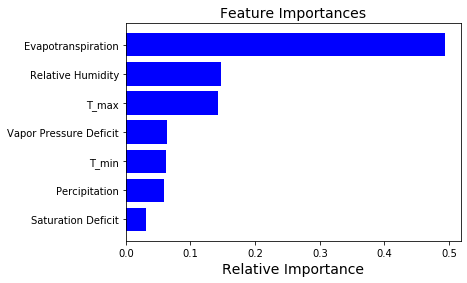

In [21]:
features = labels
importances = rf.feature_importances_
indices = np.argsort(importances)


plt.title('Feature Importances',fontsize=14)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance',fontsize=14)
plt.show()



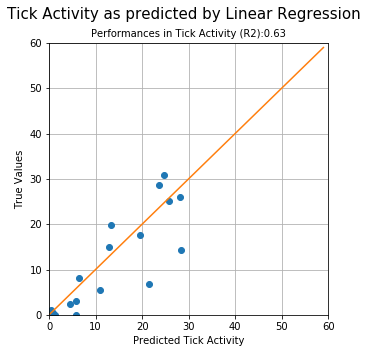

In [22]:
# A crossplot of y-prediction vs y 

f, (ax1) = plt.subplots(1, 1, figsize=(5,5))

a = range(0,60)
b = a

ax1.set_xlim(0,60)
ax1.set_ylim(0,60)
ax1.plot(ypred,ytest,'o')
ax1.plot(a,b,)
ax1.set_xlabel("Predicted Tick Activity",fontsize=10)
ax1.set_ylabel("True Values",fontsize=10)
ax1.set_title("Performances in Tick Activity (R2):0.63",fontsize=10)
ax1.grid()


plt.suptitle("Tick Activity as predicted by Linear Regression",fontsize=15)
plt.savefig(r"C:\UPM\EC Spatial Temporal Analysis\GROUP PROJECT\Graphs\crossplot.png")

In [23]:
# Load the weather data of 2015-2016 for prediction
pre_ede = np.loadtxt(r"C:\UPM\EC Spatial Temporal Analysis\GROUP PROJECT\Data\Pre_processing\weather_1516_mon.csv",delimiter = ',', skiprows = 1, usecols=range(3, 10))


In [24]:
tick = rf.predict(pre_ede)
print(tick)

[ 0.4461172   1.92377859  6.93299883 28.87864    29.838962   37.325331
 41.366487   26.260699   13.655428    9.700684    6.43987     4.793719
  0.95523471  2.60555884  4.25614751 11.960434   28.846052   28.26962
 28.091629   27.651737   36.816738    7.795263    0.82888111  1.15154702]


In [25]:
np.savetxt(r"C:\UPM\EC Spatial Temporal Analysis\GROUP PROJECT\Data\Pre_processing\tick_activity_2015to2016.csv",tick)